# Data preparation for the cluster data.

Here we will use the classes we have defined in star_sample.py to import the cluster data.

This doesn't necessarily give us a complete cluster, however it gives us likely elements.

In [1]:
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
if('Cluster_sample' in os.getcwd()):
    os.chdir('../')
from star_sample import StarSample, Isochrones

# Prepare the Cluster in DataFrame Form:

We make some necessary cuts so that we have an accurate sample. We set the cluster distance to be the same for everything. We can do this as we know that cluster elements are all at the same distance roughly. This will allow us to test some essential parts to our models.

In [2]:
os.chdir("Data")
cluster_df=pd.read_csv('cluster_members_final.csv')
os.chdir("../")
probability='p3'
cluster_df=cluster_df[cluster_df['phot_bp_mean_flux_error']<1000].reset_index(drop=True)
cluster_df=cluster_df[cluster_df[probability]>0.9].reset_index(drop=True)
cluster_df=cluster_df[cluster_df['rgeo']>=1.8].reset_index(drop=True)
cluster_df=cluster_df[cluster_df['rgeo']<=2.5].reset_index(drop=True)
cluster_df=cluster_df[cluster_df['bp_rp']<=1.6].reset_index(drop=True)
cluster_df['rgeo']=2.0
cluster_df=cluster_df[['ra','dec','parallax','phot_g_mean_mag','phot_g_mean_flux','phot_rp_mean_flux','phot_bp_mean_flux',
                        'phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','mean_absolute_mag_g_band','ra_error','dec_error',
                        'parallax_error','phot_g_mean_flux_error','phot_bp_mean_flux_error',
                        'phot_rp_mean_flux_error','mh_gspphot','logg_gspphot','rgeo']].reset_index(drop=True)

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_12762/3688838446.py:2: DtypeWarning: Columns (11,12,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cluster_df=pd.read_csv('cluster_members_final.csv')


We could also make a cut based on logg, however as of now we will leave it out.

In [3]:
#cluster_df=cluster_df[cluster_df['logg_gspphot']>2.4]

In [4]:
import sys
sys.getsizeof([cluster_df])

64

# Isochrone parameters.
For our cluster we will set the agegrid to be 8.0 to 9.0 to capture the literature age of the cluster. The metalicity is around 0.17 from literature so we shall set that as a part of the grid.

In [5]:
filters = ["Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3']
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = np.linspace(8.0,9,10)
fehgrid = [0.17]#np.linspace(-4,0.5,90)

# Use dataforms to get the form of the data and save using pickle.

In [6]:
features=[['ra','dec','parallax','phot_g_mean_mag','bp_rp','rgeo']]
errors=[['ra_error','dec_error','parallax_error','phot_g_mean_mag_error','bp_rp_error']]

cluster=StarSample(cluster_df,features,errors)

In [7]:
isocs=Isochrones(filters,logagegrid,massgrid,fehgrid)

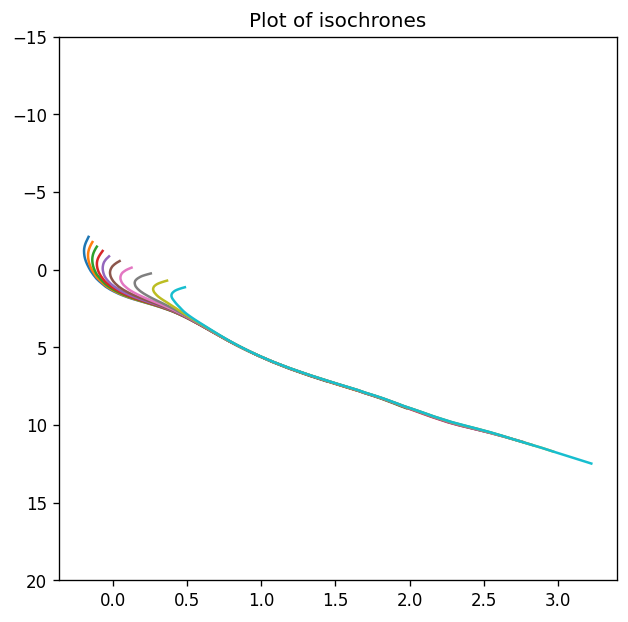

In [8]:
isocs.plot_isochrones()

# Save using Pickle

The data form is very specific, in partular it is designed so that the isochrones are defined as (n_isochrones, len(n_isochrone_points longest with pad), features) so then the tensor of x values will 
have to be (n_datapoints, repeat len(longest isochrone), n_features)

In [9]:
import pickle
os.chdir("Data")

output=open('isochrones_cluster.pkl','wb') #convert to a dataframe
pickle.dump(isocs,output) #save to file

output=open('cluster_values.pkl','wb') #convert to a dataframe
pickle.dump(cluster,output)#save to file
os.chdir('..')

In [10]:
isocs.stack_isochrones()

tensor([[[   4.6702,    3.6354,   -0.8842,  ...,    3.1161,    7.4687,
             7.6600],
         [   4.6620,    3.6436,   -0.8311,  ...,    3.0852,    7.2725,
             7.4731],
         [   4.6535,    3.6523,   -0.7758,  ...,    3.3083,    7.0618,
             7.2434],
         ...,
         [   3.4949,    4.1016,    3.0044,  ...,  -19.5449,   -2.0653,
            -2.0241],
         [   3.4761,    4.0995,    3.0162,  ...,  -24.6108,   -2.1076,
            -2.0671],
         [   3.4585,    4.0978,    3.0288,  ..., -107.5024,   -2.1500,
            -2.1128]],

        [[   4.6992,    3.6104,   -1.0515,  ...,    2.9609,    8.1018,
             8.3058],
         [   4.6878,    3.6182,   -0.9962,  ...,    2.9242,    7.8970,
             8.1085],
         [   4.6762,    3.6263,   -0.9392,  ...,    3.0578,    7.6706,
             7.8745],
         ...,
         [      nan,       nan,       nan,  ...,       nan,       nan,
                nan],
         [      nan,       nan,       na